In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 1.8 MB/s eta 0:00:00


In [17]:
# Importations nécessaires
import pandas as pd
from bs4 import BeautifulSoup
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Charger le dataset
df = pd.read_csv("IMDB Dataset.csv")

In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
df.head().transpose()

,0,1,2,3,4
review,One of the other reviewers has mentioned that ...,A wonderful little production. <br /><br />The...,I thought this was a wonderful way to spend ti...,Basically there's a family where a little boy ...,"Petter Mattei's ""Love in the Time of Money"" is..."
sentiment,positive,positive,positive,negative,positive


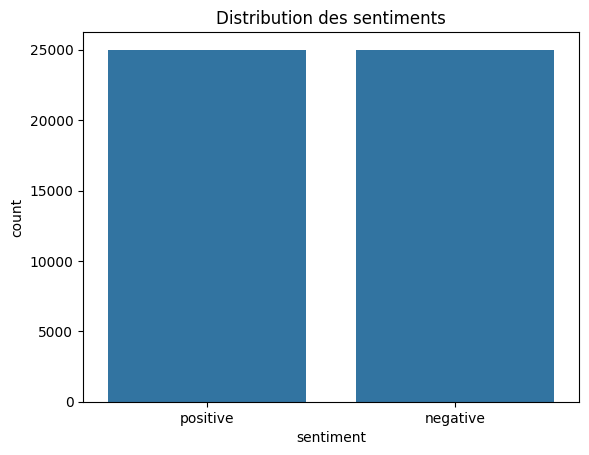

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la distribution des sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution des sentiments')
plt.show()

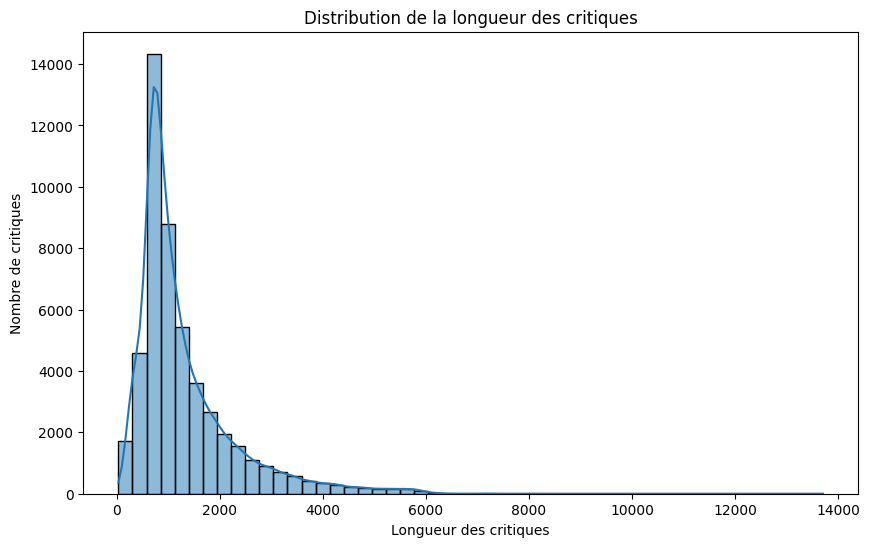

In [21]:
# Calculer la longueur des critiques
df['review_length'] = df['review'].apply(len)

# Afficher la distribution de la longueur des critiques
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution de la longueur des critiques')
plt.xlabel('Longueur des critiques')
plt.ylabel('Nombre de critiques')
plt.show()

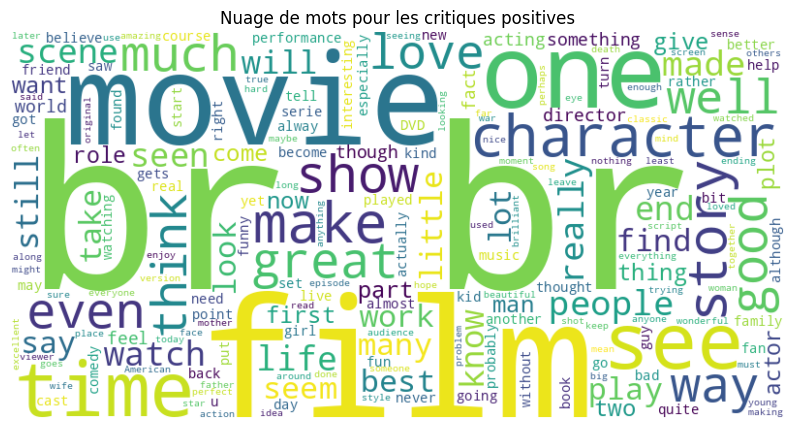

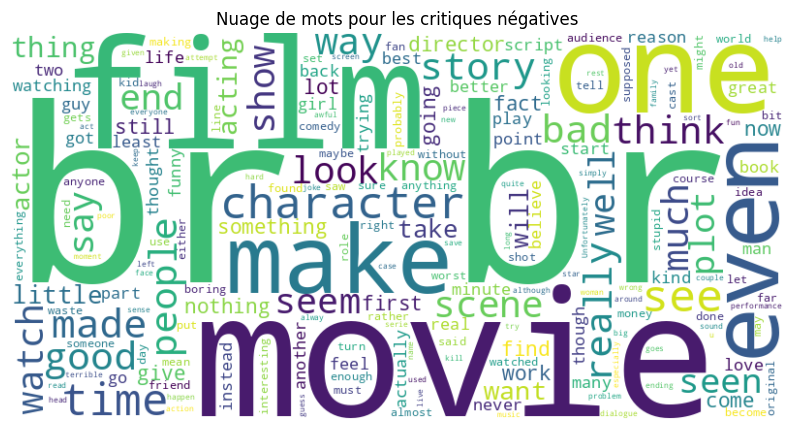

In [22]:
from wordcloud import WordCloud

# Générer un nuage de mots pour les critiques positives
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Afficher le nuage de mots pour les critiques positives
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les critiques positives')
plt.show()

# Générer un nuage de mots pour les critiques négatives
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Afficher le nuage de mots pour les critiques négatives
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les critiques négatives')
plt.show()

# Nouvelle section

In [ ]:
# Fonction pour nettoyer le texte des critiques
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text() # Enlever les balises HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Enlever tout sauf les lettres
    text = text.lower() # Convertir en minuscules
    return text

# Appliquer le nettoyage à chaque critique
df['cleaned_review'] = df['review'].apply(clean_text)

<ipython-input-24-45c5d4d01507>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text() # Enlever les balises HTML


In [25]:
# Tokenisation et conversion des textes en séquences
tokenizer = Tokenizer(num_words=10000) # Limite à 10 000 mots
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

# Padding des séquences pour avoir la même longueur
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [26]:
# Préparation des labels
labels = df['sentiment'].map({'positive': 1, 'negative': 0}).values

In [28]:
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Création du modèle
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128)) # Couche d'embedding, Le  input_length=max_length n'a pas fonctionné j'ai dû supprimer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Couche LSTM
model.add(Dense(1, activation='sigmoid')) # Couche de sortie

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entraînement du modèle
model.fit(padded_sequences, labels, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3604s 3s/step - accuracy: 0.7239 - loss: 0.5374 - val_accuracy: 0.7698 - val_loss: 0.4866
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3586s 3s/step - accuracy: 0.8262 - loss: 0.4048 - val_accuracy: 0.7114 - val_loss: 0.5645
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3628s 3s/step - accuracy: 0.8586 - loss: 0.3400 - val_accuracy: 0.8874 - val_loss: 0.2716
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3594s 3s/step - accuracy: 0.9222 - loss: 0.2025 - val_accuracy: 0.8987 - val_loss: 0.2590
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3635s 3s/step - accuracy: 0.9473 - loss: 0.1506 - val_accuracy: 0.9007 - val_loss: 0.2722


In [31]:
df.review[51]

'***SPOILERS*** All too, in real life as well as in the movies, familiar story that happens to many young men who are put in a war zone with a gun, or rifle, in their hands. The case of young and innocent, in never handling or firing a gun, Jimmy Davis, Franchot Tone, has been repeated thousands of times over the centuries when men, like Jimmy Davis, are forced to take up arms for their country.<br /><br />Jimmy who at first wanted to be kicked out of the US Army but was encouraged to stay, by being belted in the mouth, by his good friend Fred P. Willis, Spencer Tracy, ended up on the front lines in France. With Jimmy\'s unit pinned down by a German machine gun nest he single handedly put it out of commission picking off some half dozen German soldiers from the safety of a nearby church steeple. It was when Jimmy gunned down the last surviving German, who raised his arms in surrender, that an artillery shell hit the steeple seriously wounding him.<br /><br />Recovering from his wounds 

In [32]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Charger le modèle de vectorisation
model = SentenceTransformer('all-MiniLM-L6-v2')

# Votre texte choisi
texte_choisi = df.review[51]

# Les 10 textes similaires
textes_similaires = [
    "Michael, untrained in combat, finds himself on the front lines. Inspired by his mentor, he becomes a wartime hero but loses his innocence. Returning home, he struggles with his conscience and past, ultimately accepting his fate and seeking redemption through acts of kindness.",
    "Drafted against his will, Alex becomes a valiant soldier by accident. His return to civilian life is marked by tough choices leading him into crime. Confronted with his actions, he decides to surrender, hoping to find peace in accepting his guilt.",
    "Trained to be a pacifist, Chris finds himself caught in the whirlwind of war. He saves his comrades but at a personal high cost. Post-war, he battles his inner demons, seeking forgiveness in a final act of sacrifice.",
    "Heroic on the battlefield, Jonathan comes home transformed. He dives into the dark world of illegality, thinking to find his place. When the love of his life discovers the truth, he's forced to face the consequences of his choices.",
    "Young and naive, William becomes a feared fighter. His reintegration into society is hard, leading him down a dark path. When his past catches up, he must choose between love and freedom, opting for a tragic but liberating end.",
    "Drafted into war unwillingly, Daniel finds strength in adversity. Back home, he's faced with a moral choice that pushes him into crime. His quest for redemption leads him to a desperate act to protect those he loves.",
    "A war hero, Lucas hides a heavy secret. His life of crime catches up when the love of his life discovers the truth. Confronted with his actions, he chooses to sacrifice himself for the sake of his loved ones.",
    "Transformed by war, Simon returns with invisible scars. His descent into criminality is interrupted by love and betrayal. In a final act of redemption, he surrenders to justice, hoping to redeem himself.",
    "Forced into being a soldier, Vincent survives the war but loses his soul. Engaging in criminal activities, he's eventually confronted by his past. His decision to give up violence for love marks his final act of bravery.",
    "Becoming a warrior against his wishes, Henry struggles to reintegrate into society. His life spirals into illegality until a lost love brings him back to reality. Faced with a deadlock, he chooses an end he sees as the only honorable way out."
]

# Vectoriser le texte choisi et les 10 textes similaires
text_vectors = model.encode([texte_choisi] + textes_similaires)

# Calculer la similarité cosinus entre le texte choisi et chaque texte similaire
for i, text_vector in enumerate(text_vectors[1:], start=1):
    similarity_score = cosine_similarity([text_vectors[0]], [text_vector])[0][0]
    print(f"Similarité avec le texte {i}: {similarity_score}")

Similarité avec le texte 1: 0.32937702536582947
Similarité avec le texte 2: 0.30173131823539734
Similarité avec le texte 3: 0.31222009658813477
Similarité avec le texte 4: 0.36743849515914917
Similarité avec le texte 5: 0.20833584666252136
Similarité avec le texte 6: 0.29184338450431824
Similarité avec le texte 7: 0.2963402271270752
Similarité avec le texte 8: 0.2369331419467926
Similarité avec le texte 9: 0.3188216984272003
Similarité avec le texte 10: 0.22763168811798096
